## Time series power consumption predictions

Using pycaret for predicting power consumption in Norwegian cities based on weather data.

In [7]:
location = 'oslo'
predict_hours = 72

start_time = '2022-04-10 21:00:00'
end_time = '2022-04-20 21:00:00'

In [8]:
import pandas as pd

start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

df = pd.read_csv('consumption_temp.csv')
# filter data for Oslo into new dataframe
data = df[df['location'] == location]
data['Date'] = pd.to_datetime(data['time'])

# Include only data between start_time and end_time
data = data[(data['Date'] >= start_time) & (data['Date'] <= end_time)]

In [9]:
data.dtypes

time                   object
location               object
consumption           float64
temperature           float64
Date           datetime64[ns]
dtype: object

In [10]:
data.set_index('Date', inplace=True, drop=True)

<AxesSubplot: xlabel='Date'>

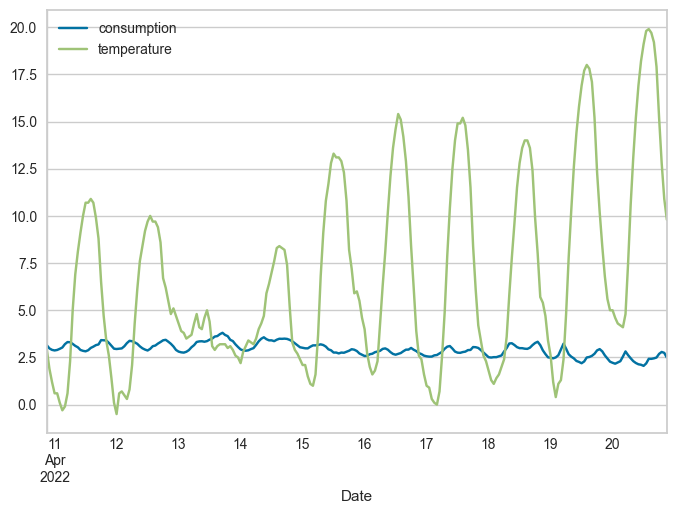

In [11]:
data.plot()

In [12]:
from pycaret.time_series import *

data = data[['consumption', 'temperature']]

s = setup(data, fold=3, fh= 24, session_id=123, target='consumption')

,Description,Value
0,session_id,123
1,Target,consumption
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(241, 2)"
5,Transformed data shape,"(241, 2)"
6,Transformed train set shape,"(217, 2)"
7,Transformed test set shape,"(24, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [13]:
plot_model()

In [14]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8785,0.7735,0.1694,0.2022,0.0619,0.0611,0.2184,0.6100
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8838,0.8481,0.1732,0.2244,0.0632,0.0624,0.0337,0.7067
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8944,0.7952,0.1710,0.2068,0.0636,0.0620,0.1398,0.6300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9064,0.8040,0.1745,0.2097,0.0643,0.0628,0.1540,0.5100
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9067,0.8001,0.1743,0.2085,0.0643,0.0629,0.1580,0.6333
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9198,0.8184,0.1775,0.2144,0.0647,0.0640,0.0933,0.7300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.9274,0.8017,0.1785,0.2093,0.0660,0.0642,0.1228,0.4300
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.9274,0.8017,0.1785,0.2093,0.0660,0.0642,0.1228,0.5767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9274,0.8017,0.1785,0.2093,0.0660,0.0642,0.1228,0.5633
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9566,0.8308,0.1846,0.2173,0.0677,0.0665,0.1068,1.4500


In [15]:
predict_model(best, fh=predict_hours)

,y_pred
2022-04-19 22:00,2.4859
2022-04-19 23:00,2.3696
2022-04-20 00:00,2.3187
2022-04-20 01:00,2.3115
2022-04-20 02:00,2.3401
...,...
2022-04-22 17:00,2.8621
2022-04-22 18:00,2.9363
2022-04-22 19:00,2.9301
2022-04-22 20:00,2.8447


In [16]:
plot_model(best, plot='train_test_split')

In [17]:
# Forecasting 72 hours into the future
plot_model(best, plot='forecast', data_kwargs={'fh': predict_hours})